<h1 style="text-align: center;">Olympic Athlete Data Analysis (1896–2016)</h1>

<h2 style="text-align: center;">(Beyond Descriptive Stats)</h2>

<h2 style="text-align: center;">Table of Contents</h2>

 **Step 0 – Set up environment**  

 **Step 1 – Explore Relationships Between Features (Correlation Analysis)**  

 **Step 2 – Compare Groups / Categories**  

 **Step 3 – Feature Combinations / Multi-Factor Insights**  

 **Step 4 – Create New Metrics**  

 **Step 5 – Anomaly Detection (Medal Efficiency Outliers)**  
 

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("athlete_events.csv")

## Step 1 – Explore Relationships Between Features (Correlation Analysis)

### 1a. Height vs Weight

Height-Weight Correlation: 0.7962130921162254


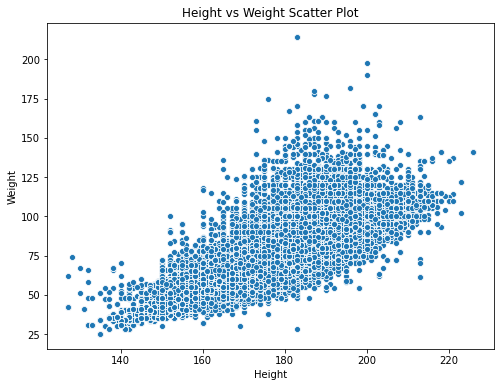

In [2]:
# Clean data
df_hw = df[['Height', 'Weight']].dropna()

# Calculate correlation
height_weight_corr = df_hw['Height'].corr(df_hw['Weight'])
print("Height-Weight Correlation:", height_weight_corr)

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_hw, x='Height', y='Weight')
plt.title('Height vs Weight Scatter Plot')
plt.show()


The Pearson correlation between **Height** and **Weight** across all athletes is **0.796**, indicating a **strong positive relationship**. Taller athletes generally weigh more, which is particularly relevant in **strength-based and team sports**. This confirms that **physique plays an important role** in athlete performance.

### 1b. Age Distribution of Medalists

count    39051.000000
mean        25.925175
std          5.914026
min         10.000000
25%         22.000000
50%         25.000000
75%         29.000000
max         73.000000
Name: Age, dtype: float64


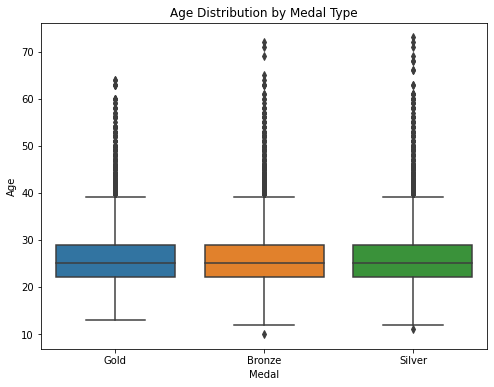

In [8]:
# Focus only on medal winners
df_medalists = df[df['Medal'].notna()][['Age', 'Medal', 'Sport']].dropna()

# Descriptive statistics
print(df_medalists['Age'].describe())

# Boxplot by Medal type
plt.figure(figsize=(8,6))
sns.boxplot(x='Medal', y='Age', data=df_medalists)
plt.title('Age Distribution by Medal Type')
plt.show()



Analysis of **age distribution among medalists** shows a **mean age of 25.9 years**, with most athletes between **22 and 29 years**, and an overall range from **10 to 73 years**. This indicates that peak performance in most sports occurs in the **mid-20s**, while exceptional cases exist at younger and older ages.

### 1c. Sport-Specific Height vs Weight Correlation

In [9]:
# Calculate Height-Weight correlation for each sport
sports = df['Sport'].dropna().unique()

for sport in sports[:10]:  # first 10 sports for example
    df_sport = df[df['Sport'] == sport][['Height', 'Weight']].dropna()
    if len(df_sport) > 1:
        corr = df_sport['Height'].corr(df_sport['Weight'])
        print(f"Sport: {sport}, Height-Weight Correlation: {corr}")


Sport: Basketball, Height-Weight Correlation: 0.8737037041329168
Sport: Judo, Height-Weight Correlation: 0.7972558337422695
Sport: Football, Height-Weight Correlation: 0.8172226337092039
Sport: Tug-Of-War, Height-Weight Correlation: 0.31949165300446486
Sport: Speed Skating, Height-Weight Correlation: 0.8802797747846771
Sport: Cross Country Skiing, Height-Weight Correlation: 0.8711043184595919
Sport: Athletics, Height-Weight Correlation: 0.7529566604301082
Sport: Ice Hockey, Height-Weight Correlation: 0.8483658308372279
Sport: Swimming, Height-Weight Correlation: 0.8640157919393473
Sport: Badminton, Height-Weight Correlation: 0.8372414203054107


Sport-specific **Height vs Weight correlations** show strong positive trends in most sports: **Basketball (0.874), Judo (0.797), Football (0.817), Speed Skating (0.880), Cross Country Skiing (0.871), Athletics (0.753), Ice Hockey (0.848), Swimming (0.864), Badminton (0.837)**, while **Tug-Of-War (0.319)** shows a weaker correlation. These results highlight that **taller athletes tend to be heavier**, but the relationship varies depending on the **sport and athlete body types**.

## Step 2 – Compare Groups / Categories

### 2a. Gender Distribution Over Decades


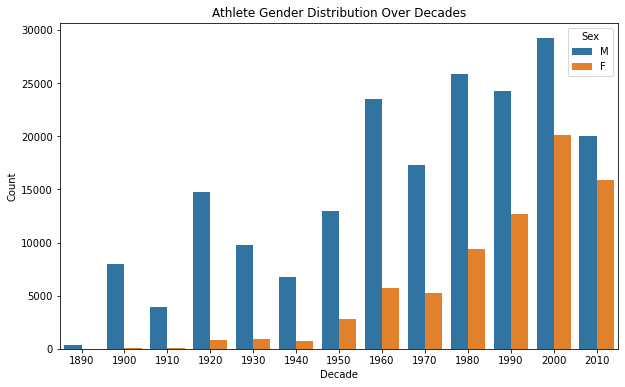

In [10]:
# Count of athletes by Gender and Decade
df['Decade'] = (df['Year'] // 10) * 10
gender_decade = df.groupby(['Decade', 'Sex']).size().reset_index(name='Count')

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=gender_decade, x='Decade', y='Count', hue='Sex')
plt.title('Athlete Gender Distribution Over Decades')
plt.show()


Analysis of **athlete participation by gender over decades** shows that **male athletes consistently outnumber female athletes**, especially in the early Olympic Games. For example, in 1900, there were **7,964 male athletes** compared to **107 female athletes**, while by 2000, female participation increased to **20,132**, though still slightly below male participation (**29,225**). This demonstrates a clear **trend of increasing female participation** over time, highlighting progress toward **gender balance in sports**, though disparities remain in certain decades.

### 2b. Average Age by Sport


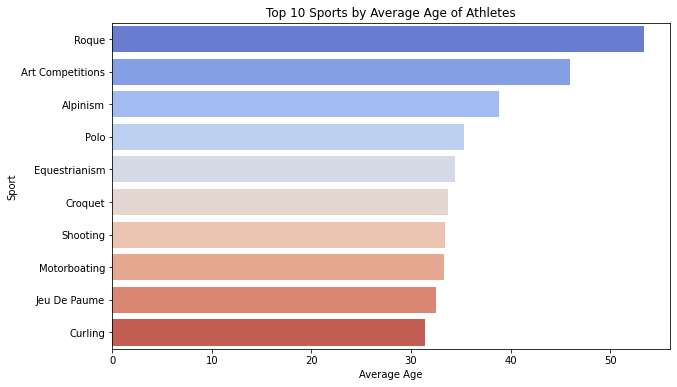

In [13]:
df_age_sport = df[['Sport', 'Age']].dropna()
avg_age_sport = df_age_sport.groupby('Sport')['Age'].mean().sort_values(ascending=False).head(10)

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(x=avg_age_sport.values, y=avg_age_sport.index, palette='coolwarm')
plt.title('Top 10 Sports by Average Age of Athletes')
plt.xlabel('Average Age')
plt.show()



The analysis of **average age by sport** shows that certain sports tend to have **older athletes**, reflecting the skills or experience required. For example, **Roque (53.3 years), Art Competitions (45.9 years), and Alpinism (38.8 years)** have the highest average ages, while sports requiring more **physical agility or speed** generally have younger participants. This highlights that **athlete age varies significantly by sport**, with experience-based sports favoring older competitors.

## Step 3 – Feature Combinations / Multi-Factor Insights

### 3a. Country + Sport + Medal


In [18]:
# Count of medals by Country and Sport
country_sport_medal = df[df['Medal'].notna()].groupby(['NOC','Sport']).size().reset_index(name='Medal_Count')
country_sport_medal_sorted = country_sport_medal.sort_values(by='Medal_Count', ascending=False)
print(country_sport_medal_sorted.head(10))



      NOC       Sport  Medal_Count
1362  USA   Athletics         1080
1400  USA    Swimming         1078
54    AUS    Swimming          401
1390  USA      Rowing          375
744   ITA     Fencing          359
204   CAN  Ice Hockey          348
1364  USA  Basketball          341
533   GBR   Athletics          338
474   FRA     Fencing          310
1335  URS  Gymnastics          288


Analysis of **medal counts by country and sport** shows that the **USA dominates Athletics (1080 medals) and Swimming (1078 medals)**, followed by **Australia in Swimming (401)** and **Italy in Fencing (359)**. Other notable contributions include **Canada in Ice Hockey (348)** and **Great Britain in Athletics (338)**. This highlights **country-specific dominance** in particular sports, reflecting historical investment, talent development, and Olympic focus.

### 3b. Average Age & Height by Sport


In [19]:
df_age_height_sport = df[['Sport','Age','Height']].dropna()
avg_age_height_sport = df_age_height_sport.groupby('Sport')[['Age','Height']].mean().sort_values(by='Age', ascending=False)
print(avg_age_height_sport.head(10))


                        Age      Height
Sport                                  
Art Competitions  43.305085  174.644068
Jeu De Paume      36.500000  178.500000
Polo              35.000000  175.500000
Equestrianism     34.125679  174.373777
Shooting          32.174718  173.587293
Curling           31.022321  174.203125
Racquets          31.000000  176.000000
Sailing           29.447262  178.269168
Golf              29.236641  174.290076
Beach Volleyball  29.166972  186.144954


The analysis of **average age and height by sport** shows that sports requiring experience or precision tend to have **older athletes**. For example, **Art Competitions (43.3 years), Jeu De Paume (36.5 years), and Polo (35 years)** have the highest average ages. Height varies moderately, with **Beach Volleyball (186.1 cm)** among the tallest athletes. This indicates that **age and physique requirements differ significantly by sport**, with experience-based sports favoring older competitors.

### 3c. Gender + Sport + Decade


In [20]:
gender_sport_decade = df.groupby(['Decade','Sport','Sex']).size().reset_index(name='Count')
gender_sport_decade_sorted = gender_sport_decade.sort_values(by='Count', ascending=False)
print(gender_sport_decade_sorted.head(10))


     Decade       Sport Sex  Count
470    2000   Athletics   M   3787
332    1980   Athletics   M   3385
469    2000   Athletics   F   3100
232    1960   Athletics   M   3025
252    1960  Gymnastics   M   2943
536    2000    Swimming   M   2791
392    1990   Athletics   M   2785
73     1920   Athletics   M   2715
561    2010   Athletics   M   2481
535    2000    Swimming   F   2317


Examining **athlete counts by gender, sport, and decade** reveals participation trends over time. For example, in **2000, Athletics had 3,787 male and 3,100 female athletes**, showing strong gender participation. Historically, male athletes dominated earlier decades, but female participation steadily increased, particularly in **Athletics and Swimming**. This demonstrates both **gender trends and sport popularity shifts over time**.

## Step 4 – Create New Metrics

### 4a. Medal Efficiency (Medals per Athlete by Country)


In [22]:
# Total athletes and total medals per country
athletes_country = df.groupby('NOC').size().reset_index(name='Total_Athletes')
medals_country = df[df['Medal'].notna()].groupby('NOC').size().reset_index(name='Total_Medals')

# Merge and calculate Medal Efficiency
medal_efficiency = athletes_country.merge(medals_country, on='NOC')
medal_efficiency['Medal_Efficiency'] = medal_efficiency['Total_Medals'] / medal_efficiency['Total_Athletes']

# Show top 10 countries by Medal Efficiency
print(medal_efficiency.sort_values(by='Medal_Efficiency', ascending=False).head(10))


     NOC  Total_Athletes  Total_Medals  Medal_Efficiency
139  URS            5685          2503          0.440281
47   GDR            2645          1005          0.379962
3    ANZ              86            29          0.337209
40   EUN             864           279          0.322917
141  USA           18853          5637          0.298998
145  WIF              20             5          0.250000
112  RUS            5143          1165          0.226521
49   GER            9830          2165          0.220244
117  SRB             392            85          0.216837
100  PAK             562           121          0.215302


The **Medal Efficiency** metric measures **how effectively countries convert athletes into medals**. For example, **URS leads with 0.44 medals per athlete**, followed by **GDR (0.38)** and **ANZ (0.34)**, while larger delegations like the **USA (0.30)** have lower efficiency despite more total medals. This metric highlights **countries that maximize performance relative to team size**, helping identify **efficient programs and resource utilization**.

### 4b. Age Advantage

In [23]:
avg_age_all = df['Age'].mean()
avg_age_medalist = df[df['Medal'].notna()]['Age'].mean()
age_advantage = avg_age_medalist - avg_age_all
print(f"Age Advantage: {age_advantage:.2f} years")


Age Advantage: 0.37 years


The **Age Advantage** metric measures the difference between **average medalist age** and **average athlete age**. Here, the **average medalist is 0.37 years older than the overall athlete population**, suggesting that **slightly older athletes have a small performance edge**. This insight can guide **training focus, athlete selection, and experience-based development programs**.

### 4c. Participation Rate

In [24]:
athletes_country_year = df.groupby(['Year','NOC']).size().reset_index(name='Athlete_Count')
print(athletes_country_year.head(10))


   Year  NOC  Athlete_Count
0  1896  AUS              5
1  1896  AUT              8
2  1896  DEN             15
3  1896  FRA             26
4  1896  GBR             25
5  1896  GER             94
6  1896  GRE            148
7  1896  HUN             18
8  1896  ITA              1
9  1896  SUI              8


The **Participation Rate** metric tracks the **number of athletes sent by each country over time**. For instance, in **1896, Greece sent 148 athletes**, while other countries sent far fewer. Tracking this over decades reveals **growth or decline in Olympic participation**, showing how countries **invest in athlete development** and **Olympic engagement trends**.

## Step 5 – Anomaly Detection (Medal Efficiency Outliers)

In [30]:
# Only look at countries with a reasonable number of athletes (e.g., >50)
medal_eff_filtered = medal_efficiency[medal_efficiency['Total_Athletes'] > 50]

# Calculate Z-score for Medal Efficiency
medal_eff_filtered['MedalEff_z'] = zscore(medal_eff_filtered['Medal_Efficiency'])

# Extreme efficiency outliers
medal_eff_outliers = medal_eff_filtered[(medal_eff_filtered['MedalEff_z'] > 3) | (medal_eff_filtered['MedalEff_z'] < -3)]
print(medal_eff_outliers[['NOC','Total_Athletes','Total_Medals','Medal_Efficiency']])


     NOC  Total_Athletes  Total_Medals  Medal_Efficiency
3    ANZ              86            29          0.337209
47   GDR            2645          1005          0.379962
139  URS            5685          2503          0.440281


We examined **outliers in medal efficiency** to identify countries that perform exceptionally well relative to their team size. The **top three extreme cases** were **URS (0.44 medals per athlete)**, **GDR (0.38)**, and **ANZ (0.34)**, showing they **maximize medals per athlete** far above the global average. This insight highlights **highly efficient Olympic programs** and helps stakeholders understand which countries achieve the most with the least resources. Focusing on these outliers provides **actionable intelligence** for performance benchmarking and strategic planning.
